**1. Basic CNN Model**

In [ ]:
from google.colab import drive
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization, Activation, Add, AveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Mount Google Drive
drive.mount('/content/drive')

# Function to extract age and gender from the filename
def extract_label(filename):
    try:
        parts = filename.split('_')
        age = int(parts[0])
        gender = int(parts[1])  # Assuming 0 for male and 1 for female
        return age, gender
    except ValueError:
        print(f"Skipping file with unexpected filename format: {filename}")
        return None, None

# Function to load images and labels from a given folder
def load_images_from_folder(folder):
    images = []
    age_labels = []
    gender_labels = []

    # Iterate over all files in the folder
    for filename in os.listdir(folder):
        # Construct the full file path
        file_path = folder / filename
        # Read the image file
        img = cv2.imread(str(file_path))
        if img is not None:
            # Resize the image
            img = cv2.resize(img, (224, 224))  # Resize images to 224x224
            age, gender = extract_label(filename)
            if age is not None and gender is not None:  # Only add images with valid labels
                images.append(img)
                age_labels.append(age)
                gender_labels.append(gender)

    # Convert lists to numpy arrays
    images = np.array(images, dtype='float32') / 255.0  # Normalize images
    age_labels = np.array(age_labels)
    gender_labels = np.array(gender_labels)

    return images, age_labels, gender_labels

# Define path to your dataset folder in Google Drive
folder_path = Path('/content/drive/MyDrive/HGGK')

# Load images and labels
images, age_labels, gender_labels = load_images_from_folder(folder_path)

# Split data for age and gender detection
X_train_age, X_val_test_age, y_train_age, y_val_test_age = train_test_split(images, age_labels, test_size=0.3, random_state=42)
X_val_age, X_test_age, y_val_age, y_test_age = train_test_split(X_val_test_age, y_val_test_age, test_size=0.5, random_state=42)

X_train_gender, X_val_test_gender, y_train_gender, y_val_test_gender = train_test_split(images, gender_labels, test_size=0.3, random_state=42)
X_val_gender, X_test_gender, y_val_gender, y_test_gender = train_test_split(X_val_test_gender, y_val_test_gender, test_size=0.5, random_state=42)

# Define CNN model for age detection (regression)
age_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1)  # Output layer with one neuron for regression
])

# Define CNN model for gender detection (binary classification)
gender_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer with one neuron for binary classification
])

# Compile the models
age_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Set up the checkpoint directory
checkpoint_dir = '/content/drive/MyDrive/HGGK/MODEL2/checkpoints/'



# Train the age model with checkpointing
age_model.fit(
    X_train_age, y_train_age,
    validation_data=(X_val_age, y_val_age),
    epochs=100,
    callbacks=[age_checkpoint_callback]  # Add the checkpoint callback here
)

# Train the gender model with checkpointing
gender_model.fit(
    X_train_gender, y_train_gender,
    validation_data=(X_val_gender, y_val_gender),
    epochs=100,
    callbacks=[gender_checkpoint_callback]  # Add the checkpoint callback here
)

# Evaluate the age model (optional)
age_test_loss, age_test_mae = age_model.evaluate(X_test_age, y_test_age)
print('Age Model Test MAE:', age_test_mae)

# Evaluate the gender model (optional)
gender_test_loss, gender_test_acc = gender_model.evaluate(X_test_gender, y_test_gender)
print('Gender Model Test Accuracy:', gender_test_acc)



Mounted at /content/drive
Epoch 1/100
34/34 [==============================] - ETA: 0s - loss: 589.1268 - mae: 17.1600

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


34/34 [==============================] - 122s 4s/step - loss: 589.1268 - mae: 17.1600 - val_loss: 411.9064 - val_mae: 16.2000
Epoch 2/100
34/34 [==============================] - 120s 4s/step - loss: 418.9904 - mae: 14.6384 - val_loss: 390.3970 - val_mae: 16.0974
Epoch 3/100
34/34 [==============================] - 127s 4s/step - loss: 364.7969 - mae: 13.7193 - val_loss: 320.9505 - val_mae: 11.8625
Epoch 4/100
34/34 [==============================] - 138s 4s/step - loss: 321.6372 - mae: 12.6769 - val_loss: 295.6081 - val_mae: 11.6457
Epoch 5/100
34/34 [==============================] - 140s 4s/step - loss: 271.9399 - mae: 11.8619 - val_loss: 295.1407 - val_mae: 13.3931
Epoch 6/100
34/34 [==============================] - 136s 4s/step - loss: 205.0101 - mae: 10.6216 - val_loss: 281.4784 - val_mae: 12.4931
Epoch 7/100
34/34 [==============================] - 151s 4s/step - loss: 145.9655 - mae: 8.8710 - val_loss: 295.0859 - val_mae: 12.4237
Epoch 8/100
34/34 [============================

**Basic CNN with graph**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/100
34/34 [==============================] - 93s 3s/step - loss: 568.6476 - mae: 17.0559 - val_loss: 370.7522 - val_mae: 13.4203
Epoch 2/100
34/34 [==============================] - 93s 3s/step - loss: 376.8379 - mae: 13.4202 - val_loss: 344.1607 - val_mae: 13.4055
Epoch 3/100
34/34 [==============================] - 97s 3s/step - loss: 330.1740 - mae: 12.9743 - val_loss: 365.0936 - val_mae: 12.7882
Epoch 4/100
34/34 [==============================] - 91s 3s/step - loss: 316.1697 - mae: 12.5333 - val_loss: 339.2138 - val_mae: 12.3887
Epoch 5/100
34/34 [==============================] - 92s 3s/step - loss: 254.7929 - mae: 11.4510 - val_loss: 394.5916 - val_mae: 15.9898
Epoch 6/100
34/34 [==============================] - 97s 3s/step - loss: 211.8306 - mae: 10.8299 - val_loss: 324.5469 - val_mae: 12.0969
Epoch 7/100
34/34 [==============================

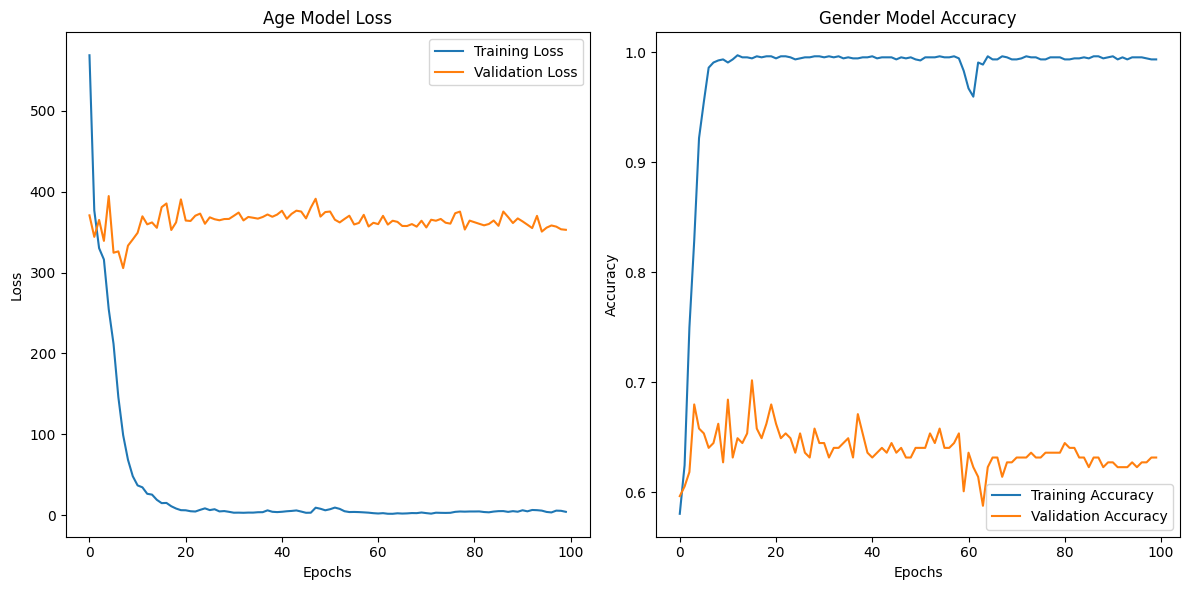

In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
from pathlib import Path

# Mount Google Drive (only necessary in Google Colab)
from google.colab import drive
drive.mount('/content/drive')

# Function to extract age and gender from file names
def extract_label(filename):
    parts = filename.split('_')
    age = int(parts[0])
    gender = int(parts[1])
    return age, gender

# Function to load images and labels from the dataset
def load_images_from_folder(folder):
    images = []
    age_labels = []
    gender_labels = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (224, 224))
            age, gender = extract_label(filename)
            images.append(img)
            age_labels.append(age)
            gender_labels.append(gender)
    images = np.array(images, dtype='float32') / 255.0
    age_labels = np.array(age_labels)
    gender_labels = np.array(gender_labels)
    return images, age_labels, gender_labels

# Set the path to your dataset
folder_path = Path('/content/drive/MyDrive/1500')
images, age_labels, gender_labels = load_images_from_folder(folder_path)

# Splitting the data into training, validation, and test sets
X_train_age, X_val_test_age, y_train_age, y_val_test_age = train_test_split(images, age_labels, test_size=0.3, random_state=42)
X_val_age, X_test_age, y_val_age, y_test_age = train_test_split(X_val_test_age, y_val_test_age, test_size=0.5, random_state=42)
X_train_gender, X_val_test_gender, y_train_gender, y_val_test_gender = train_test_split(images, gender_labels, test_size=0.3, random_state=42)
X_val_gender, X_test_gender, y_val_gender, y_test_gender = train_test_split(X_val_test_gender, y_val_test_gender, test_size=0.5, random_state=42)

# Building CNN models
def build_age_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

def build_gender_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create model instances
age_model = build_age_model()
gender_model = build_gender_model()

# Training the models
age_history = age_model.fit(X_train_age, y_train_age, validation_data=(X_val_age, y_val_age), epochs=100)
gender_history = gender_model.fit(X_train_gender, y_train_gender, validation_data=(X_val_gender, y_val_gender), epochs=100)

# Evaluating the models
age_test_loss, age_test_mae = age_model.evaluate(X_test_age, y_test_age)
print('Age Model Test MAE:', age_test_mae)
gender_test_loss, gender_test_acc = gender_model.evaluate(X_test_gender, y_test_gender)
print('Gender Model Test Accuracy:', gender_test_acc)

# Plotting the training and validation loss for the age model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(age_history.history['loss'], label='Training Loss')
plt.plot(age_history.history['val_loss'], label='Validation Loss')
plt.title('Age Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy for the gender model
plt.subplot(1, 2, 2)
plt.plot(gender_history.history['accuracy'], label='Training Accuracy')
plt.plot(gender_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Gender Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


**2. Saving the Model to drive**

In [ ]:
# Save the final trained models
final_age_model_path = '/content/drive/MyDrive/HGGK/MODEL2/age_model_final.h5'
final_gender_model_path = '/content/drive/MyDrive/HGGK/MODEL2/gender_model_final.h5'
age_model.save(final_age_model_path)
gender_model.save(final_gender_model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**3. Sample input image testing**

In [5]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np

# Paths to your saved models
age_model_path = '/content/drive/MyDrive/1500/MODEL2/age_model_final.h5'
gender_model_path = '/content/drive/MyDrive/1500/MODEL2/gender_model_final.h5'
emotion_model_path = '/content/drive/MyDrive/emotion_little_vgg_2.h5'  # Update with the correct path

# Load the models
age_model = load_model(age_model_path)
gender_model = load_model(gender_model_path)
emotion_model = load_model(emotion_model_path)  # Load the emotion classifier model

def preprocess_image(image_path, size=(224, 224), color_mode='rgb'):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE if color_mode == 'grayscale' else cv2.IMREAD_COLOR)
    if img is None:
        print(f"Failed to load image: {image_path}")
        return None
    img = cv2.resize(img, size)
    img = img / 255.0
    if color_mode == 'grayscale':
        img = np.expand_dims(img, axis=-1)  # Add channel dimension for grayscale
    return img.reshape(1, *size, img.shape[-1])

# Example usage
test_image_path = '/content/drive/MyDrive/1500/32_0_4_20170117140145171.jpg'
processed_image = preprocess_image(test_image_path)  # For age and gender
emotion_image = preprocess_image(test_image_path, size=(48, 48), color_mode='grayscale')  # For emotion

# Predict age
predicted_age = age_model.predict(processed_image)
print(f"Predicted Age: {predicted_age[0][0]}")

# Predict gender
predicted_gender_prob = gender_model.predict(processed_image)
predicted_gender = "Male" if predicted_gender_prob[0][0] < 0.5 else "Female"
print(f"Predicted Gender: {predicted_gender}")

# Predict emotion
predicted_emotion_prob = emotion_model.predict(emotion_image)
predicted_emotion = np.argmax(predicted_emotion_prob, axis=1)
emotion_labels = ['Happy', 'Sad', 'Angry', 'Surprise', 'Fear' , 'Neutral']  # Update with your actual labels
predicted_emotion_label = emotion_labels[predicted_emotion[0]]
print(f"Predicted Emotion: {predicted_emotion_label}")


1/1 [==============================] - 0s 181ms/step
Predicted Age: 33.67253112792969
1/1 [==============================] - 0s 178ms/step
Predicted Gender: Male
1/1 [==============================] - 0s 440ms/step
Predicted Emotion: Surprise


**4. Evalution metrices for basic CNN**

---



In [5]:
import os
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error, classification_report, accuracy_score

# Function to load images and labels for testing
def load_images_from_folder(folder, img_size=(224, 224)):
    images = []
    age_labels = []
    gender_labels = []
    for filename in os.listdir(folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = cv2.imread(os.path.join(folder, filename))
            img = cv2.resize(img, img_size)
            img = img / 255.0  # Normalize pixel values
            images.append(img)
            age, gender = filename.split('_')[0:2]
            age_labels.append(int(age))
            gender_labels.append(int(gender))
    images = np.array(images, dtype='float32')
    age_labels = np.array(age_labels)
    gender_labels = np.array(gender_labels)
    return images, age_labels, gender_labels

# Load the test data
test_data_folder = '/content/drive/MyDrive/1500'  # Update this path to your folder of test images
X_test, y_test_age, y_test_gender = load_images_from_folder(test_data_folder)

# Load the models
age_model_path = '/content/drive/MyDrive/1500/MODEL2/age_model_final.h5'
gender_model_path = '/content/drive/MyDrive/1500/MODEL2/gender_model_final.h5'
age_model = load_model(age_model_path)
gender_model = load_model(gender_model_path)

# Predict on the test data
predicted_ages = age_model.predict(X_test).flatten()
predicted_genders = gender_model.predict(X_test).flatten()

# For gender, we need to convert probabilities to binary values (e.g., 0 or 1)
predicted_genders_binary = np.round(predicted_genders)

# Calculate Mean Absolute Error for age predictions
mae = mean_absolute_error(y_test_age, predicted_ages)
print(f"Mean Absolute Error for Age Model: {mae}")

# Calculate classification metrics for gender predictions
gender_accuracy = accuracy_score(y_test_gender, predicted_genders_binary)
report = classification_report(y_test_gender, predicted_genders_binary, target_names=['Male', 'Female'])
print(f"Accuracy for Gender Model: {gender_accuracy}")
print("Classification Report for Gender Model:")
print(report)


48/48 [==============================] - 39s 809ms/step
Mean Absolute Error for Age Model: 5.144403089105181
Accuracy for Gender Model: 0.8946675444371297
Classification Report for Gender Model:
              precision    recall  f1-score   support

        Male       0.89      0.86      0.88       658
      Female       0.90      0.92      0.91       861

    accuracy                           0.89      1519
   macro avg       0.89      0.89      0.89      1519
weighted avg       0.89      0.89      0.89      1519



**4.Sample input images testing for the model YOLOv5**



  



In [ ]:
# Import necessary libraries
import torch
import numpy as np
import cv2
from PIL import Image
from models.common import DetectMultiBackend
from utils.general import non_max_suppression, check_img_size
from utils.augmentations import letterbox
from utils.torch_utils import select_device
from tensorflow.keras.models import load_model
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Function to load the YOLOv5 model
def load_yolov5_model(weights_path, device):
    model = DetectMultiBackend(weights_path, device=device)
    model.eval()
    return model

# Function to preprocess images for YOLOv5
def preprocess_image_yolo(image_path, img_size=640):
    try:
        img0 = Image.open(image_path).convert('RGB')
    except IOError:
        print(f"Error: Unable to open image file {image_path}.")
        return None, None

    img0 = np.array(img0)
    img = letterbox(img0, img_size)[0]
    img = img.transpose((2, 0, 1))  # HWC to CHW
    img = np.ascontiguousarray(img)
    img = torch.from_numpy(img).to(device)
    img = img.float()  # uint8 to fp16/32
    img /= 255  # Normalize
    if len(img.shape) == 3:
        img = img.unsqueeze(0)
    return img, img0

# Function to preprocess images for age and gender models
def preprocess_image_for_age_gender(image, size=224):
    image = cv2.resize(image, (size, size))  # Resize image
    image = image.astype('float32') / 255.0  # Normalize
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Function to run YOLOv5 and get predictions
def run_yolo_on_image(model, img):
    pred = model(img, augment=False, visualize=False)[0]
    pred = non_max_suppression(pred, 0.25, 0.45, classes=None, agnostic=False, max_det=1000)
    return pred

# Load models
device = select_device('')  # Select device (cpu or cuda)
yolo_weights = 'yolov5s.pt'  # Path to YOLOv5 weights
age_model_path = '/content/drive/MyDrive/2000/age2000_model.h5'
gender_model_path = '/content/drive/MyDrive/2000/gender2000_model.h5'
emotion_model_path = '/content/drive/MyDrive/emotion_little_vgg_2.h5
yolo_model = load_yolov5_model(yolo_weights, device)
age_model = load_model(age_model_path)
gender_model = load_model(gender_model_path)

# Main image processing function
# Main image processing function
def process_image(image_path):
    img, img0 = preprocess_image_yolo(image_path)
    if img is None or img0 is None:
        return  # Exit if image preprocessing failed

    pred = run_yolo_on_image(yolo_model, img)

    for i, det in enumerate(pred):  # detections per image
        if len(det):
            # Take only the first detected face
            *xyxy, conf, cls = det[0]
            x1, y1, x2, y2 = map(int, xyxy)
            if isinstance(img0, np.ndarray):
                img0 = Image.fromarray(img0)
            face_img = img0.crop((x1, y1, x2, y2))
            processed_face = preprocess_image_for_age_gender(np.array(face_img))
            age = age_model.predict(processed_face)[0][0]
            gender_prob = gender_model.predict(processed_face)[0][0]
            gender = 'Male' if gender_prob < 0.5 else 'Female'

            print(f'Detected: Age: {age}, Gender: {gender}')
            break  # Exit the loop after processing the first face

# Example usage
test_image_path = '/content/drive/MyDrive/HGGK/SAMPh/32_0_4_20170117140145171.jpg'
process_image(test_image_path)



YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs


1/1 [==============================] - 0s 142ms/step
Detected: Age: 36.32455825805664, Gender: Male


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**5. CNN Model for higher images**

In [ ]:
from google.colab import drive
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization, Activation, Add, AveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Mount Google Drive
drive.mount('/content/drive')

# Function to extract age and gender from the filename
def extract_label(filename):
    try:
        parts = filename.split('_')
        age = int(parts[0])
        gender = int(parts[1])  # Assuming 0 for male and 1 for female
        return age, gender
    except ValueError:
        print(f"Skipping file with unexpected filename format: {filename}")
        return None, None

# Function to load images and labels from a given folder
def load_images_from_folder(folder):
    images = []
    age_labels = []
    gender_labels = []

    # Iterate over all files in the folder
    for filename in os.listdir(folder):
        # Construct the full file path
        file_path = folder / filename
        # Read the image file
        img = cv2.imread(str(file_path))
        if img is not None:
            # Resize the image
            img = cv2.resize(img, (224, 224))  # Resize images to 224x224
            age, gender = extract_label(filename)
            if age is not None and gender is not None:  # Only add images with valid labels
                images.append(img)
                age_labels.append(age)
                gender_labels.append(gender)

    # Convert lists to numpy arrays
    images = np.array(images, dtype='float32') / 255.0  # Normalize images
    age_labels = np.array(age_labels)
    gender_labels = np.array(gender_labels)

    return images, age_labels, gender_labels

# Define path to your dataset folder in Google Drive
folder_path = Path('/content/drive/MyDrive/JGGH')

# Load images and labels
images, age_labels, gender_labels = load_images_from_folder(folder_path)

# Split data for age and gender detection
X_train_age, X_val_test_age, y_train_age, y_val_test_age = train_test_split(images, age_labels, test_size=0.3, random_state=42)
X_val_age, X_test_age, y_val_age, y_test_age = train_test_split(X_val_test_age, y_val_test_age, test_size=0.5, random_state=42)

X_train_gender, X_val_test_gender, y_train_gender, y_val_test_gender = train_test_split(images, gender_labels, test_size=0.3, random_state=42)
X_val_gender, X_test_gender, y_val_gender, y_test_gender = train_test_split(X_val_test_gender, y_val_test_gender, test_size=0.5, random_state=42)

# Define CNN model for age detection (regression)
age_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1)  # Output layer with one neuron for regression
])

# Define CNN model for gender detection (binary classification)
gender_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer with one neuron for binary classification
])

# Compile the models
age_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Set up the checkpoint directory
checkpoint_dir = '/content/drive/MyDrive/HGGK/MODEL2/checkpoints/'


# Train the age model with checkpointing
age_model.fit(
    X_train_age, y_train_age,
    validation_data=(X_val_age, y_val_age),
    epochs=100,
    callbacks=[age_checkpoint_callback]  # Add the checkpoint callback here
)

# Train the gender model with checkpointing
gender_model.fit(
    X_train_gender, y_train_gender,
    validation_data=(X_val_gender, y_val_gender),
    epochs=100,
    callbacks=[gender_checkpoint_callback]  # Add the checkpoint callback here
)

# Evaluate the age model (optional)
age_test_loss, age_test_mae = age_model.evaluate(X_test_age, y_test_age)
print('Age Model Test MAE:', age_test_mae)

# Evaluate the gender model (optional)
gender_test_loss, gender_test_acc = gender_model.evaluate(X_test_gender, y_test_gender)
print('Gender Model Test Accuracy:', gender_test_acc)



Mounted at /content/drive
Epoch 1/100
35/35 [==============================] - ETA: 0s - loss: 265.1042 - mae: 10.5026

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


35/35 [==============================] - 101s 3s/step - loss: 265.1042 - mae: 10.5026 - val_loss: 167.2431 - val_mae: 7.3895
Epoch 2/100
35/35 [==============================] - 108s 3s/step - loss: 138.2834 - mae: 6.7730 - val_loss: 154.3522 - val_mae: 6.5523
Epoch 3/100
35/35 [==============================] - 96s 3s/step - loss: 126.4536 - mae: 6.1840 - val_loss: 157.8838 - val_mae: 6.5482
Epoch 4/100
35/35 [==============================] - 99s 3s/step - loss: 116.4936 - mae: 5.7447 - val_loss: 153.1350 - val_mae: 6.1737
Epoch 5/100
35/35 [==============================] - 113s 3s/step - loss: 113.7739 - mae: 5.9474 - val_loss: 149.0250 - val_mae: 6.1909
Epoch 6/100
35/35 [==============================] - 103s 3s/step - loss: 100.5053 - mae: 5.6661 - val_loss: 167.4299 - val_mae: 8.1557
Epoch 7/100
35/35 [==============================] - 113s 3s/step - loss: 85.9322 - mae: 5.2020 - val_loss: 147.5881 - val_mae: 6.7971
Epoch 8/100
35/35 [==============================] - 101s 3s/s

**6. Sample input image testing for CNN with Higher images**

In [9]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np

# Paths to your saved models
age_model_path = '/content/drive/MyDrive/2000/age2000_model.h5'
gender_model_path = '/content/drive/MyDrive/2000/gender2000_model.h5'
emotion_model_path = '/content/drive/MyDrive/emotion_little_vgg_2.h5'  # Update with the correct path

# Load the models
age_model = load_model(age_model_path)
gender_model = load_model(gender_model_path)
emotion_model = load_model(emotion_model_path)  # Load the emotion classifier model

def preprocess_image(image_path, size=(224, 224), color_mode='rgb'):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE if color_mode == 'grayscale' else cv2.IMREAD_COLOR)
    if img is None:
        print(f"Failed to load image: {image_path}")
        return None
    img = cv2.resize(img, size)
    img = img / 255.0
    if color_mode == 'grayscale':
        img = np.expand_dims(img, axis=-1)  # Add channel dimension for grayscale
    return img.reshape(1, *size, img.shape[-1])

# Example usage
test_image_path = '/content/drive/MyDrive/2000/22_1_2_20170116172719532.jpg'
processed_image = preprocess_image(test_image_path)  # For age and gender
emotion_image = preprocess_image(test_image_path, size=(48, 48), color_mode='grayscale')  # For emotion

# Predict age
predicted_age = age_model.predict(processed_image)
print(f"Predicted Age: {predicted_age[0][0]}")

# Predict gender
predicted_gender_prob = gender_model.predict(processed_image)
predicted_gender = "Male" if predicted_gender_prob[0][0] < 0.5 else "Female"
print(f"Predicted Gender: {predicted_gender}")

# Predict emotion
predicted_emotion_prob = emotion_model.predict(emotion_image)
predicted_emotion = np.argmax(predicted_emotion_prob, axis=1)
emotion_labels = ['Happy', 'Sad', 'Angry', 'Surprise', 'Fear' , 'Neutral']  # Update with your actual labels
predicted_emotion_label = emotion_labels[predicted_emotion[0]]
print(f"Predicted Emotion: {predicted_emotion_label}")


1/1 [==============================] - 0s 139ms/step
Predicted Age: 21.97981071472168
1/1 [==============================] - 0s 158ms/step
Predicted Gender: Female
1/1 [==============================] - 0s 406ms/step
Predicted Emotion: Surprise


**7. CNN model with higher image and graph**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/75
35/35 [==============================] - 135s 4s/step - loss: 290.4409 - mae: 10.9248 - val_loss: 126.6433 - val_mae: 7.0423
Epoch 2/75
35/35 [==============================] - 129s 4s/step - loss: 145.2364 - mae: 7.0389 - val_loss: 123.9072 - val_mae: 6.2079
Epoch 3/75
35/35 [==============================] - 129s 4s/step - loss: 131.1979 - mae: 6.1923 - val_loss: 122.4025 - val_mae: 6.0857
Epoch 4/75
35/35 [==============================] - 133s 4s/step - loss: 132.9794 - mae: 6.4823 - val_loss: 122.7896 - val_mae: 6.7916
Epoch 5/75
35/35 [==============================] - 121s 3s/step - loss: 118.5445 - mae: 5.6178 - val_loss: 106.0595 - val_mae: 5.1641
Epoch 6/75
35/35 [==============================] - 119s 3s/step - loss: 130.4031 - mae: 6.2206 - val_loss: 106.6555 - val_mae: 5.5482
Epoch 7/75
35/35 [==============================] - 124s 4s/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Models have been saved to Drive.


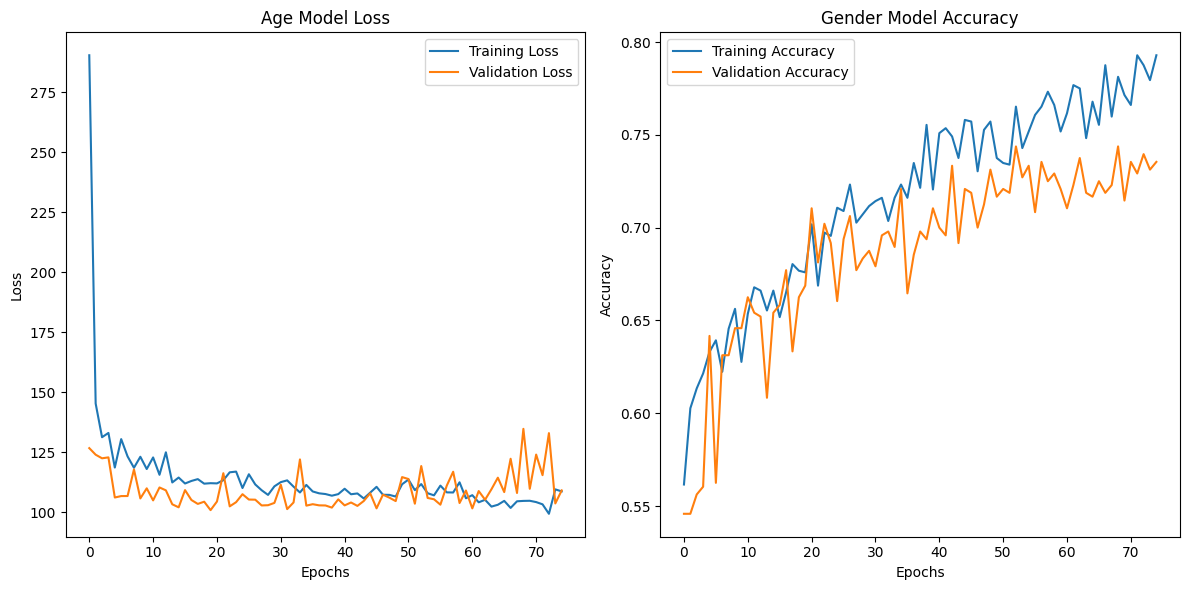

In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from pathlib import Path

# Mount Google Drive (if using Google Colab)
from google.colab import drive
drive.mount('/content/drive')

# Function to extract age and gender from file names
def extract_label(filename):
    parts = filename.split('_')
    age = int(parts[0])
    gender = int(parts[1])
    return age, gender

# Function to load images and labels from the dataset
def load_images_from_folder(folder):
    images = []
    age_labels = []
    gender_labels = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (224, 224))
            age, gender = extract_label(filename)
            images.append(img)
            age_labels.append(age)
            gender_labels.append(gender)
    images = np.array(images, dtype='float32') / 255.0
    age_labels = np.array(age_labels)
    gender_labels = np.array(gender_labels)
    return images, age_labels, gender_labels

# Set the path to your dataset
folder_path = Path('/content/drive/MyDrive/2000')  # Update this path
images, age_labels, gender_labels = load_images_from_folder(folder_path)

# Splitting the data into training and test sets
X_train, X_test, y_train_age, y_test_age = train_test_split(images, age_labels, test_size=0.3, random_state=42)
_, _, y_train_gender, y_test_gender = train_test_split(images, gender_labels, test_size=0.3, random_state=42)

# Data augmentation settings
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Building CNN models
def build_age_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

def build_gender_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create model instances
age_model = build_age_model()
gender_model = build_gender_model()

# Training the models with data augmentation
age_history = age_model.fit(datagen.flow(X_train, y_train_age, batch_size=32), validation_data=(X_test, y_test_age), epochs=75)
gender_history = gender_model.fit(datagen.flow(X_train, y_train_gender, batch_size=32), validation_data=(X_test, y_test_gender), epochs=75)

# Evaluating the models
age_test_loss, age_test_mae = age_model.evaluate(X_test, y_test_age)
print('Age Model Test MAE:', age_test_mae)
gender_test_loss, gender_test_acc = gender_model.evaluate(X_test, y_test_gender)
print('Gender Model Test Accuracy:', gender_test_acc)

age_model.save('/content/drive/MyDrive/2000/age2000_model.h5')  # Saves the age model
gender_model.save('/content/drive/MyDrive/2000/gender2000_model.h5')  # Saves the gender model
print("Models have been saved to Drive.")

# Plotting the training and validation loss for the age model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(age_history.history['loss'], label='Training Loss')
plt.plot(age_history.history['val_loss'], label='Validation Loss')
plt.title('Age Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy for the gender model
plt.subplot(1, 2, 2)
plt.plot(gender_history.history['accuracy'], label='Training Accuracy')
plt.plot(gender_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Gender Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


**7.evalution metrices for CNN higher images for testing**

In [10]:
import os
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error, classification_report, accuracy_score

# Function to load images and labels for testing
def load_images_from_folder(folder, img_size=(224, 224)):
    images = []
    age_labels = []
    gender_labels = []
    for filename in os.listdir(folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = cv2.imread(os.path.join(folder, filename))
            img = cv2.resize(img, img_size)
            img = img / 255.0  # Normalize pixel values
            images.append(img)
            age, gender = filename.split('_')[0:2]
            age_labels.append(int(age))
            gender_labels.append(int(gender))
    images = np.array(images, dtype='float32')
    age_labels = np.array(age_labels)
    gender_labels = np.array(gender_labels)
    return images, age_labels, gender_labels

# Load the test data
test_data_folder = '/content/drive/MyDrive/2000'  # Update this path to your folder of test images
X_test, y_test_age, y_test_gender = load_images_from_folder(test_data_folder)

# Load the models
age_model_path = '/content/drive/MyDrive/2000/age2000_model.h5'
gender_model_path = '/content/drive/MyDrive/2000/gender2000_model.h5'
age_model = load_model(age_model_path)
gender_model = load_model(gender_model_path)

# Predict on the test data
predicted_ages = age_model.predict(X_test).flatten()
predicted_genders = gender_model.predict(X_test).flatten()

# For gender, we need to convert probabilities to binary values (e.g., 0 or 1)
predicted_genders_binary = np.round(predicted_genders)

# Calculate Mean Absolute Error for age predictions
mae = mean_absolute_error(y_test_age, predicted_ages)
print(f"Mean Absolute Error for Age Model: {mae}")

# Calculate classification metrics for gender predictions
gender_accuracy = accuracy_score(y_test_gender, predicted_genders_binary)
report = classification_report(y_test_gender, predicted_genders_binary, target_names=['Male', 'Female'])
print(f"Accuracy for Gender Model: {gender_accuracy}")
print("Classification Report for Gender Model:")
print(report)


50/50 [==============================] - 41s 824ms/step
Mean Absolute Error for Age Model: 5.55880540728569
Accuracy for Gender Model: 0.820625
Classification Report for Gender Model:
              precision    recall  f1-score   support

        Male       0.84      0.70      0.76       663
      Female       0.81      0.91      0.86       937

    accuracy                           0.82      1600
   macro avg       0.83      0.80      0.81      1600
weighted avg       0.82      0.82      0.82      1600



# New Section